In [1]:
'''
    In this notebook, we will practice scikit-learn or sklearn library 
    (which has popular algorithms for ML and also help in preprocessing)

    => First we will explore data, what columns we have, how to handle *Missing* Data
'''

'\n    In this notebook, we will practice scikit-learn or sklearn library \n    (which has popular algorithms for ML and also help in preprocessing)\n\n    => First we will explore data, what columns we have, how to handle *Missing* Data\n'

In [2]:
# import libraries and dataset.
import sklearn
import pandas as pd

full_data_df = pd.read_csv("DataSets/titanic.csv")

print("Shape of full Data: ")
full_data_df.shape

Shape of full Data: 


(891, 12)

In [3]:
# Print top 5 rows to get overview
full_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get Data type of columns
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


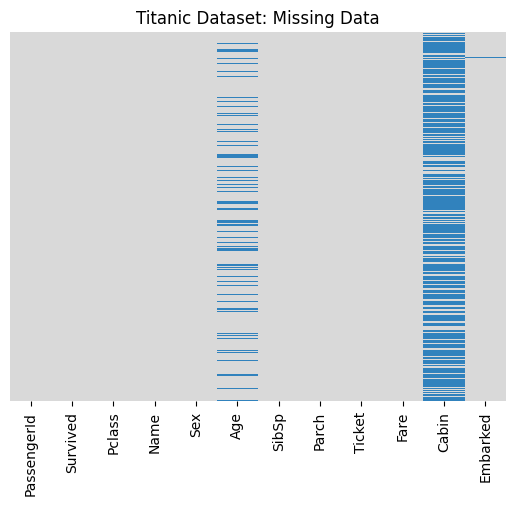

In [5]:
# Let's visualize missing values in each attribute using headmap chart
import seaborn as sns
import matplotlib.pyplot as plt


# sns.heatmap(full_data_df.isnull())
# sns.heatmap(full_data_df.isnull(), yticklabels=False)
# sns.heatmap(full_data_df.isnull(), yticklabels=False, cbar=False)
sns.heatmap(full_data_df.isnull(), yticklabels=False, cbar=False, cmap="tab20c_r")
plt.title("Titanic Dataset: Missing Data")
plt.show()


In [6]:
# CLI way to get count of nulls agains each column
# full_data_df.isnull().sum()
full_data_df.isnull().sum() + (full_data_df == '').sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
'''
    For age around 20% data missing. So, we can add median for missing entries.
    But better option is, as we have different classes.. so add age according to median
    of same class in which user is.

    While, As we can see, Cabin has too much missing data, so we have two options
    1. Delete that column
    2. Replace or change it to is_known_cabin and then (0, 1)
'''

'\n    For age around 20% data missing. So, we can add median for missing entries.\n    But better option is, as we have different classes.. so add age according to median\n    of same class in which user is.\n\n    While, As we can see, Cabin has too much missing data, so we have two options\n    1. Delete that column\n    2. Replace or change it to is_known_cabin and then (0, 1)\n'

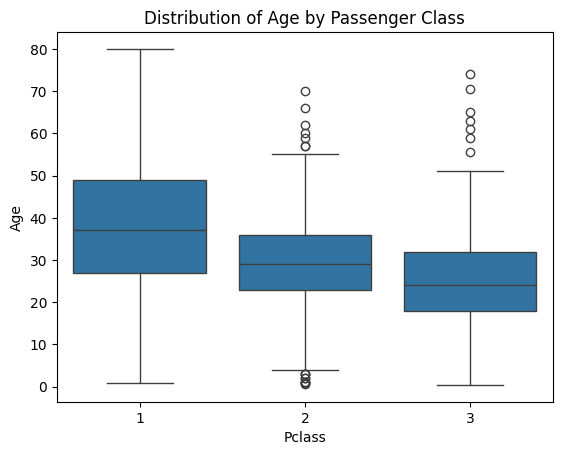

In [8]:
# Visually Check Outliers of age in each class

sns.boxplot(x='Pclass', y='Age', data=full_data_df)
plt.title('Distribution of Age by Passenger Class')
plt.show()

In [9]:
#create a function to assign age column for missing entries.
# it is also known as imputation

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# convert age now
full_data_df['Age'] = full_data_df[['Age', 'Pclass']].apply(impute_age, axis=1)

/tmp/ipykernel_6388/3690745071.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
/tmp/ipykernel_6388/3690745071.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [10]:
# Deleting Cabin column..

full_data_df.drop('Cabin', axis=1, inplace=True)

In [11]:
# Other Columns have very few null rows
# Embarked has 2 null rows which we can ignore
# lets delete all null rows

full_data_df.dropna(inplace=True)

In [12]:
full_data_df.shape

(889, 11)

In [13]:
full_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
'''
    As we have to train for survived,
    Name and Ticket are strings, also as they can't decided, either user will survive or not.
'''

"\n    As we have to train for survived,\n    Name and Ticket are strings, also as they can't decided, either user will survive or not.\n"

In [15]:
# Deleting Name and Ticket....

full_data_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Deleting Passenger id as well, as it also not helping in surviva;
full_data_df.drop('PassengerId', axis=1, inplace=True)

In [16]:
full_data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
'''
    Sex and Embarked also strings, as models only work with numbers
    so, we have to deal with them as well.

    They are basically categories, so will use numerical representation for them.
'''

'\n    Sex and Embarked also strings, as models only work with numbers\n    so, we have to deal with them as well.\n\n    They are basically categories, so will use numerical representation for them.\n'

In [18]:
categorical_object = ['Sex', 'Embarked']

for col_name in categorical_object:
    #changin type of columns, so it will help us in encoding
    full_data_df[col_name] = full_data_df[col_name]. astype('category') 

In [19]:
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 50.6 KB


In [20]:
#identification of category columns
full_data_df.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [21]:
'''
################################################################################
#               One Hot Encoding (Data Tranformation [0,1]])                   #
################################################################################
'''

'\n################################################################################\n#               One Hot Encoding (Data Tranformation [0,1]])                   #\n################################################################################\n'

In [22]:
gender = pd.get_dummies(full_data_df['Sex'], drop_first=True)

embarked = pd.get_dummies(full_data_df['Embarked'], drop_first=True)


In [23]:
full_data_df = pd.concat([full_data_df, gender, embarked], axis=1)

full_data_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

full_data_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [24]:
'''
################################################################################
#                      Data Splitting (Training & Testing)                     #
################################################################################
'''

'\n################################################################################\n#                      Data Splitting (Training & Testing)                     #\n################################################################################\n'

In [25]:
# every column except Survived
x = full_data_df.drop('Survived', axis=1)

# y is target variable/feature/column/attribute
y = full_data_df['Survived']

In [26]:
# creating train and test sets for this x and y using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=103)

In [27]:
x_train.shape

(711, 8)

In [28]:
'''
################################################################################
#                          Finally Model Training :)                           #
################################################################################
'''

'\n################################################################################\n#                          Finally Model Training :)                           #\n################################################################################\n'

In [29]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()

lreg.fit(x_train, y_train)

/home/maadi/Desktop/my_tasks/python/models_and_datasets/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
# Now Prediction
y_pred_lreg = lreg.predict(x_test)
y_pred_lreg

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0])

In [31]:
y_test.shape

(178,)

In [35]:
# It actually return pobability, for easiness it show us 0, 1

y_pred_prob_lreg = lreg.predict_proba(x_test)[:, 1]

y_pred_prob_lreg

array([0.30595104, 0.57119425, 0.34928881, 0.31864352, 0.3276792 ,
       0.46943971, 0.07758095, 0.25747263, 0.49350142, 0.21333178,
       0.47939099, 0.11167704, 0.63191479, 0.11585177, 0.84797412,
       0.39085797, 0.10447292, 0.91391244, 0.87682681, 0.12424732,
       0.07484626, 0.11840173, 0.10844204, 0.69789615, 0.07323566,
       0.56292273, 0.51805365, 0.9508434 , 0.30262415, 0.10058782,
       0.14454623, 0.13361155, 0.93689835, 0.87805773, 0.52099619,
       0.87091762, 0.45914842, 0.12429396, 0.39085797, 0.05890991,
       0.9154886 , 0.10785106, 0.1919597 , 0.78760182, 0.46919711,
       0.56006037, 0.15297855, 0.10787418, 0.08044048, 0.46922622,
       0.24480788, 0.62134301, 0.87976467, 0.08675375, 0.77385386,
       0.93710023, 0.14455024, 0.15332722, 0.10243924, 0.37155873,
       0.69794816, 0.09044782, 0.14455024, 0.73856241, 0.11646348,
       0.49323379, 0.11582715, 0.61376967, 0.13367394, 0.12431093,
       0.81129504, 0.42940872, 0.05034065, 0.06371611, 0.79627

In [36]:
for i in range(len(x_test)):
    print(f"{round(y_pred_prob_lreg[i], 3)}  ==>  {y_pred_lreg[i]}")

0.306  ==>  0
0.571  ==>  1
0.349  ==>  0
0.319  ==>  0
0.328  ==>  0
0.469  ==>  0
0.078  ==>  0
0.257  ==>  0
0.494  ==>  0
0.213  ==>  0
0.479  ==>  0
0.112  ==>  0
0.632  ==>  1
0.116  ==>  0
0.848  ==>  1
0.391  ==>  0
0.104  ==>  0
0.914  ==>  1
0.877  ==>  1
0.124  ==>  0
0.075  ==>  0
0.118  ==>  0
0.108  ==>  0
0.698  ==>  1
0.073  ==>  0
0.563  ==>  1
0.518  ==>  1
0.951  ==>  1
0.303  ==>  0
0.101  ==>  0
0.145  ==>  0
0.134  ==>  0
0.937  ==>  1
0.878  ==>  1
0.521  ==>  1
0.871  ==>  1
0.459  ==>  0
0.124  ==>  0
0.391  ==>  0
0.059  ==>  0
0.915  ==>  1
0.108  ==>  0
0.192  ==>  0
0.788  ==>  1
0.469  ==>  0
0.56  ==>  1
0.153  ==>  0
0.108  ==>  0
0.08  ==>  0
0.469  ==>  0
0.245  ==>  0
0.621  ==>  1
0.88  ==>  1
0.087  ==>  0
0.774  ==>  1
0.937  ==>  1
0.145  ==>  0
0.153  ==>  0
0.102  ==>  0
0.372  ==>  0
0.698  ==>  1
0.09  ==>  0
0.145  ==>  0
0.739  ==>  1
0.116  ==>  0
0.493  ==>  0
0.116  ==>  0
0.614  ==>  1
0.134  ==>  0
0.124  ==>  0
0.811  ==>  1
0.429  ==>

In [33]:
# Now Score/Accuracy
from sklearn.metrics import classification_report, accuracy_score

logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100, 2)

print("Classification Model for Titanic Suvival")
print('--'*20)
print(f"Accuracy = {logreg_accuracy}%")

Classification Model for Titanic Suvival
----------------------------------------
Accuracy = 83.15%


In [ ]:
# So we followed a complete framework
# Split => Fit => Predict => ScoreIt